In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("./dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("./dataset/UNSW_NB15_testing-set.csv")

In [2]:
data = pd.concat([train, test]).reset_index(drop=True)
data = data.drop(columns=["id"], axis=1)

# get numeric column names
num_cols = data._get_numeric_data().columns

# subract numeric columns from all columns to get categorical columns 
cat_cols = list(set(data.columns) - set(num_cols) - {'attack_cat'})

data.head()

data[cat_cols]

,state,service,proto
0,INT,-,udp
1,INT,-,udp
2,INT,-,udp
3,INT,-,udp
4,INT,-,udp
...,...,...,...
257668,INT,dns,udp
257669,FIN,-,tcp
257670,INT,dns,udp
257671,INT,dns,udp


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# cat_df = pd.DataFrame()
# for cat in cat_cols:
#     X = encoder.fit_transform(data[cat].values.reshape(-1, 1)).toarray()
#     cat_df = pd.concat([pd.DataFrame(X, columns=data[cat].unique()), cat_df]).reset_index(drop=True)

# cat_df.head()

data[cat_cols]
df_state = encoder.fit_transform(data['state'].values.reshape(-1, 1)).toarray()
df_service = encoder.fit_transform(data['service'].values.reshape(-1, 1)).toarray()
df_proto = encoder.fit_transform(data['proto'].values.reshape(-1, 1)).toarray()

df_state = pd.DataFrame(df_state, columns=data['state'].unique())
df_service = pd.DataFrame(df_service, columns=data['service'].unique())
df_proto = pd.DataFrame(df_proto, columns=data['proto'].unique())

print(df_state.shape, df_service.shape, df_proto.shape)

cat_df = pd.concat([df_state, df_service, df_proto], axis=1).reset_index(drop=True)
cat_df.shape

(257673, 11) (257673, 13) (257673, 133)


(257673, 157)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince

num_components = 20

mca = prince.MCA(n_components=num_components)
mca = mca.fit(data[cat_cols])

data[num_cols] = StandardScaler().fit_transform(data[num_cols])

pca = PCA(n_components=0.95)
pca = pca.fit_transform(data[num_cols])


print(mca.row_contributions_.shape, pca.shape)

(257673, 20) (257673, 21)


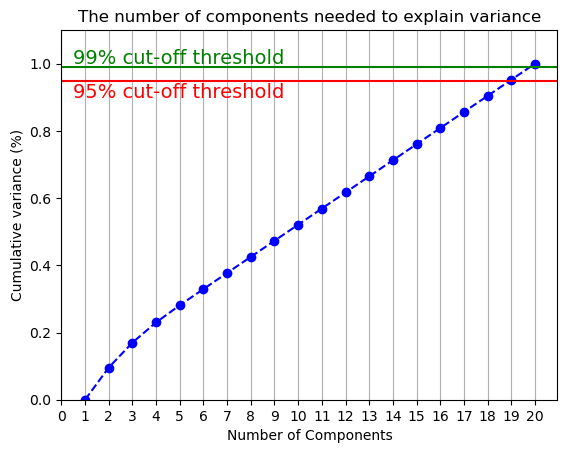

In [4]:
fig, ax = plt.subplots()
xi = np.arange(1, num_components+1, step=1)
y = mca.cumulative_percentage_of_variance_
y = (y-np.min(y))/(np.max(y)-np.min(y))

plt.rcParams["figure.figsize"] = (12,6)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, num_components+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color='red', fontsize=14)

plt.axhline(y=0.99, color='g', linestyle='-')
plt.text(0.5, 1, '99% cut-off threshold', color='green', fontsize=14)

ax.grid(axis='x')
plt.show()

In [5]:
df = pd.DataFrame([['red', 'NL'], ['blue', 'BE'], ['green', 'DE'], ['purple', 'DE']], columns=['color', 'nation'])

mca_test = prince.MCA(n_components=5)
mca_test = mca_test.fit(df)


In [6]:
dim_reduced = pd.DataFrame(np.concatenate((pca, mca.row_contributions_), axis=1))
dim_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.397809,-0.713293,-2.248982,0.952127,0.621503,-0.377912,0.053801,0.400166,-0.290617,0.146986,...,1.625270e-21,1.710442e-24,1.835655e-22,6.040837e-21,8.807517e-23,3.722140e-22,1.934386e-21,1.425960e-22,1.957489e-21,5.469441e-21
1,-0.647487,-0.949476,-2.507742,2.075608,1.125381,-1.126574,0.108503,1.091078,-0.462969,4.113590,...,1.633102e-21,1.558796e-24,1.883341e-22,6.055594e-21,8.733653e-23,3.758692e-22,1.937643e-21,1.402243e-22,1.960187e-21,5.470061e-21
2,-0.897510,-0.893496,-2.528292,1.731149,1.184814,-0.986919,0.185650,1.035444,-0.456727,3.413840,...,1.629084e-21,1.906882e-24,1.825258e-22,6.047405e-21,8.769841e-23,3.722554e-22,1.930005e-21,1.438570e-22,1.953216e-21,5.471849e-21
3,-0.828185,-0.785468,-2.318185,1.416573,0.928678,-0.752743,0.125306,0.785033,-0.392165,2.269999,...,1.629308e-21,1.691642e-24,1.848875e-22,6.045831e-21,8.686404e-23,3.732876e-22,1.928600e-21,1.438476e-22,1.958004e-21,5.476327e-21
4,-0.707173,-0.899497,-2.310802,2.156395,0.998206,-1.151770,0.045105,1.065487,-0.464376,4.390672,...,1.616924e-21,1.778005e-24,1.846952e-22,6.040170e-21,8.849418e-23,3.728272e-22,1.944235e-21,1.424442e-22,1.956393e-21,5.449672e-21


In [145]:
groups = {
    'state': ['state'],
    'service': ['service'],
    'proto': ['proto']
}

mfa = prince.MFA()
mfa = mfa.fit(data[cat_cols], groups=groups)
mfa
# prince.datasets.load_burgundy_wines()


c:\Users\janba\anaconda3\lib\site-packages\prince\mfa.py:59: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = (X - X.mean()) / ((X - X.mean()) ** 2).sum() ** 0.5


ZeroDivisionError: float division by zero

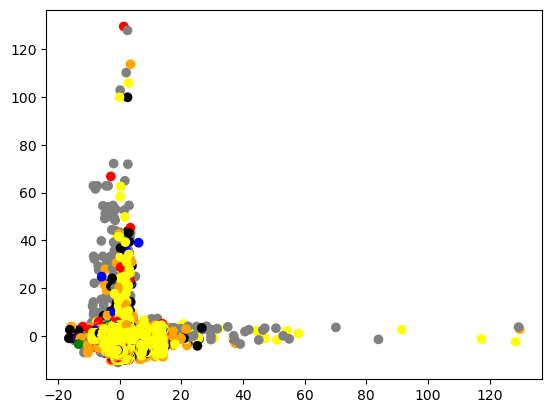

In [37]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
num_data = std_scl.fit_transform(num_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(num_data)

pca_data = pca_data.reshape(((2, 257673)))

# pca_data = StandardScaler().fit_transform(pca_data)

colors = {
    'Normal': 'gray', 
    'Reconnaissance': 'red', 
    'Backdoor': 'green', 
    'DoS': 'blue', 
    'Exploits': 'orange',
    'Analysis': 'purple', 
    'Fuzzers': 'black', 
    'Worms': 'cyan', 
    'Shellcode': 'indigo', 
    'Generic': 'yellow'
}

plt.scatter(pca_data[0], pca_data[1], color=data['attack_cat'].map(colors))
plt.show()
